
# Predicting types of trees in an area based on various geographic features 

   Arapaho National Forest is a National Forest located in north-central Colorado, United States. The facility is managed jointly with the Roosevelt National Forest and the Pawnee National Grassland from the United States Forest Service office in Fort Collins, Colorado. It has a wildlife refuge which manages a protection for all birds and mammals. The combined facility of 1,730,603 acres (2,704.07 sq mi, or 7,420.35 km²) is denoted as ARP (Arapaho, Roosevelt, Pawnee) by the Forest Service. Separately, Arapaho National Forest consists of 723,744 acres (1,130.85 sq mi, or 2,928.89 km²).


![](https://www.forestryengland.uk/sites/default/files/styles/forest_slide_wide_desk/public/media/woodland3.jpg?h=78566fdd&itok=HXeDhGX0)

    
   The forest is located in the Rocky Mountains, straddling the continental divide in the Front Range west of Denver. It was established on July 1, 1908 by President Theodore Roosevelt and named for the Arapaho tribe of Native Americans which previously inhabited the Colorado Eastern Plains. The forest includes part of the high Rockies and river valleys in the upper watershed of the Colorado River and South Platte River. The forest is largely in Grand and Clear Creek counties, but spills over into neighboring (in descending order of land area) Gilpin, Park, Routt, Jackson, and Jefferson counties. There are local ranger district offices located in Granby and Idaho Springs.

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline

# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')

df_train = pd.read_csv('../input/learn-together/train.csv')
df_test = pd.read_csv('../input/learn-together/test.csv')





for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/learn-together/sample_submission.csv
/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv


In [2]:
df_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

# Dimensions of Data

* We have 15,120 rows and 56 columns in our training set while in our testing set we have 565,892 rows and 55 columns so the problem here is we have too many rows and our algorithms may take too long also in columns we have 56 this means that some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.



In [3]:
print('Train size: ',df_train.shape)
print('Test size: ', df_test.shape)

Train size:  (15120, 56)
Test size:  (565892, 55)


# Data Fields

* **Elevation** - Elevation in meters
* **Aspect** - Aspect in degrees azimuth
* **Slope** - Slope in degrees
* **Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway
* **Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice
* **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice
* **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation
* **Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation

The wilderness areas are:

**1** - Rawah Wilderness Area

**2** - Neota Wilderness Area

**3** - Comanche Peak Wilderness Area

**4** - Cache la Poudre Wilderness Area



In [4]:
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

# Checking the data type of each attribute

* All of our attributes are integer ( int64 )


In [5]:
df_train.info() #you can check the dtypes using this method df_train.dtypes or df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

# Checking for NaN Values
* We don't have any Nan values data.

In [6]:
df_train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


# Checking if we have a duplicate data

In [7]:
df_train.duplicated().sum()

0

# Statistical Summary

In [8]:
df_train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

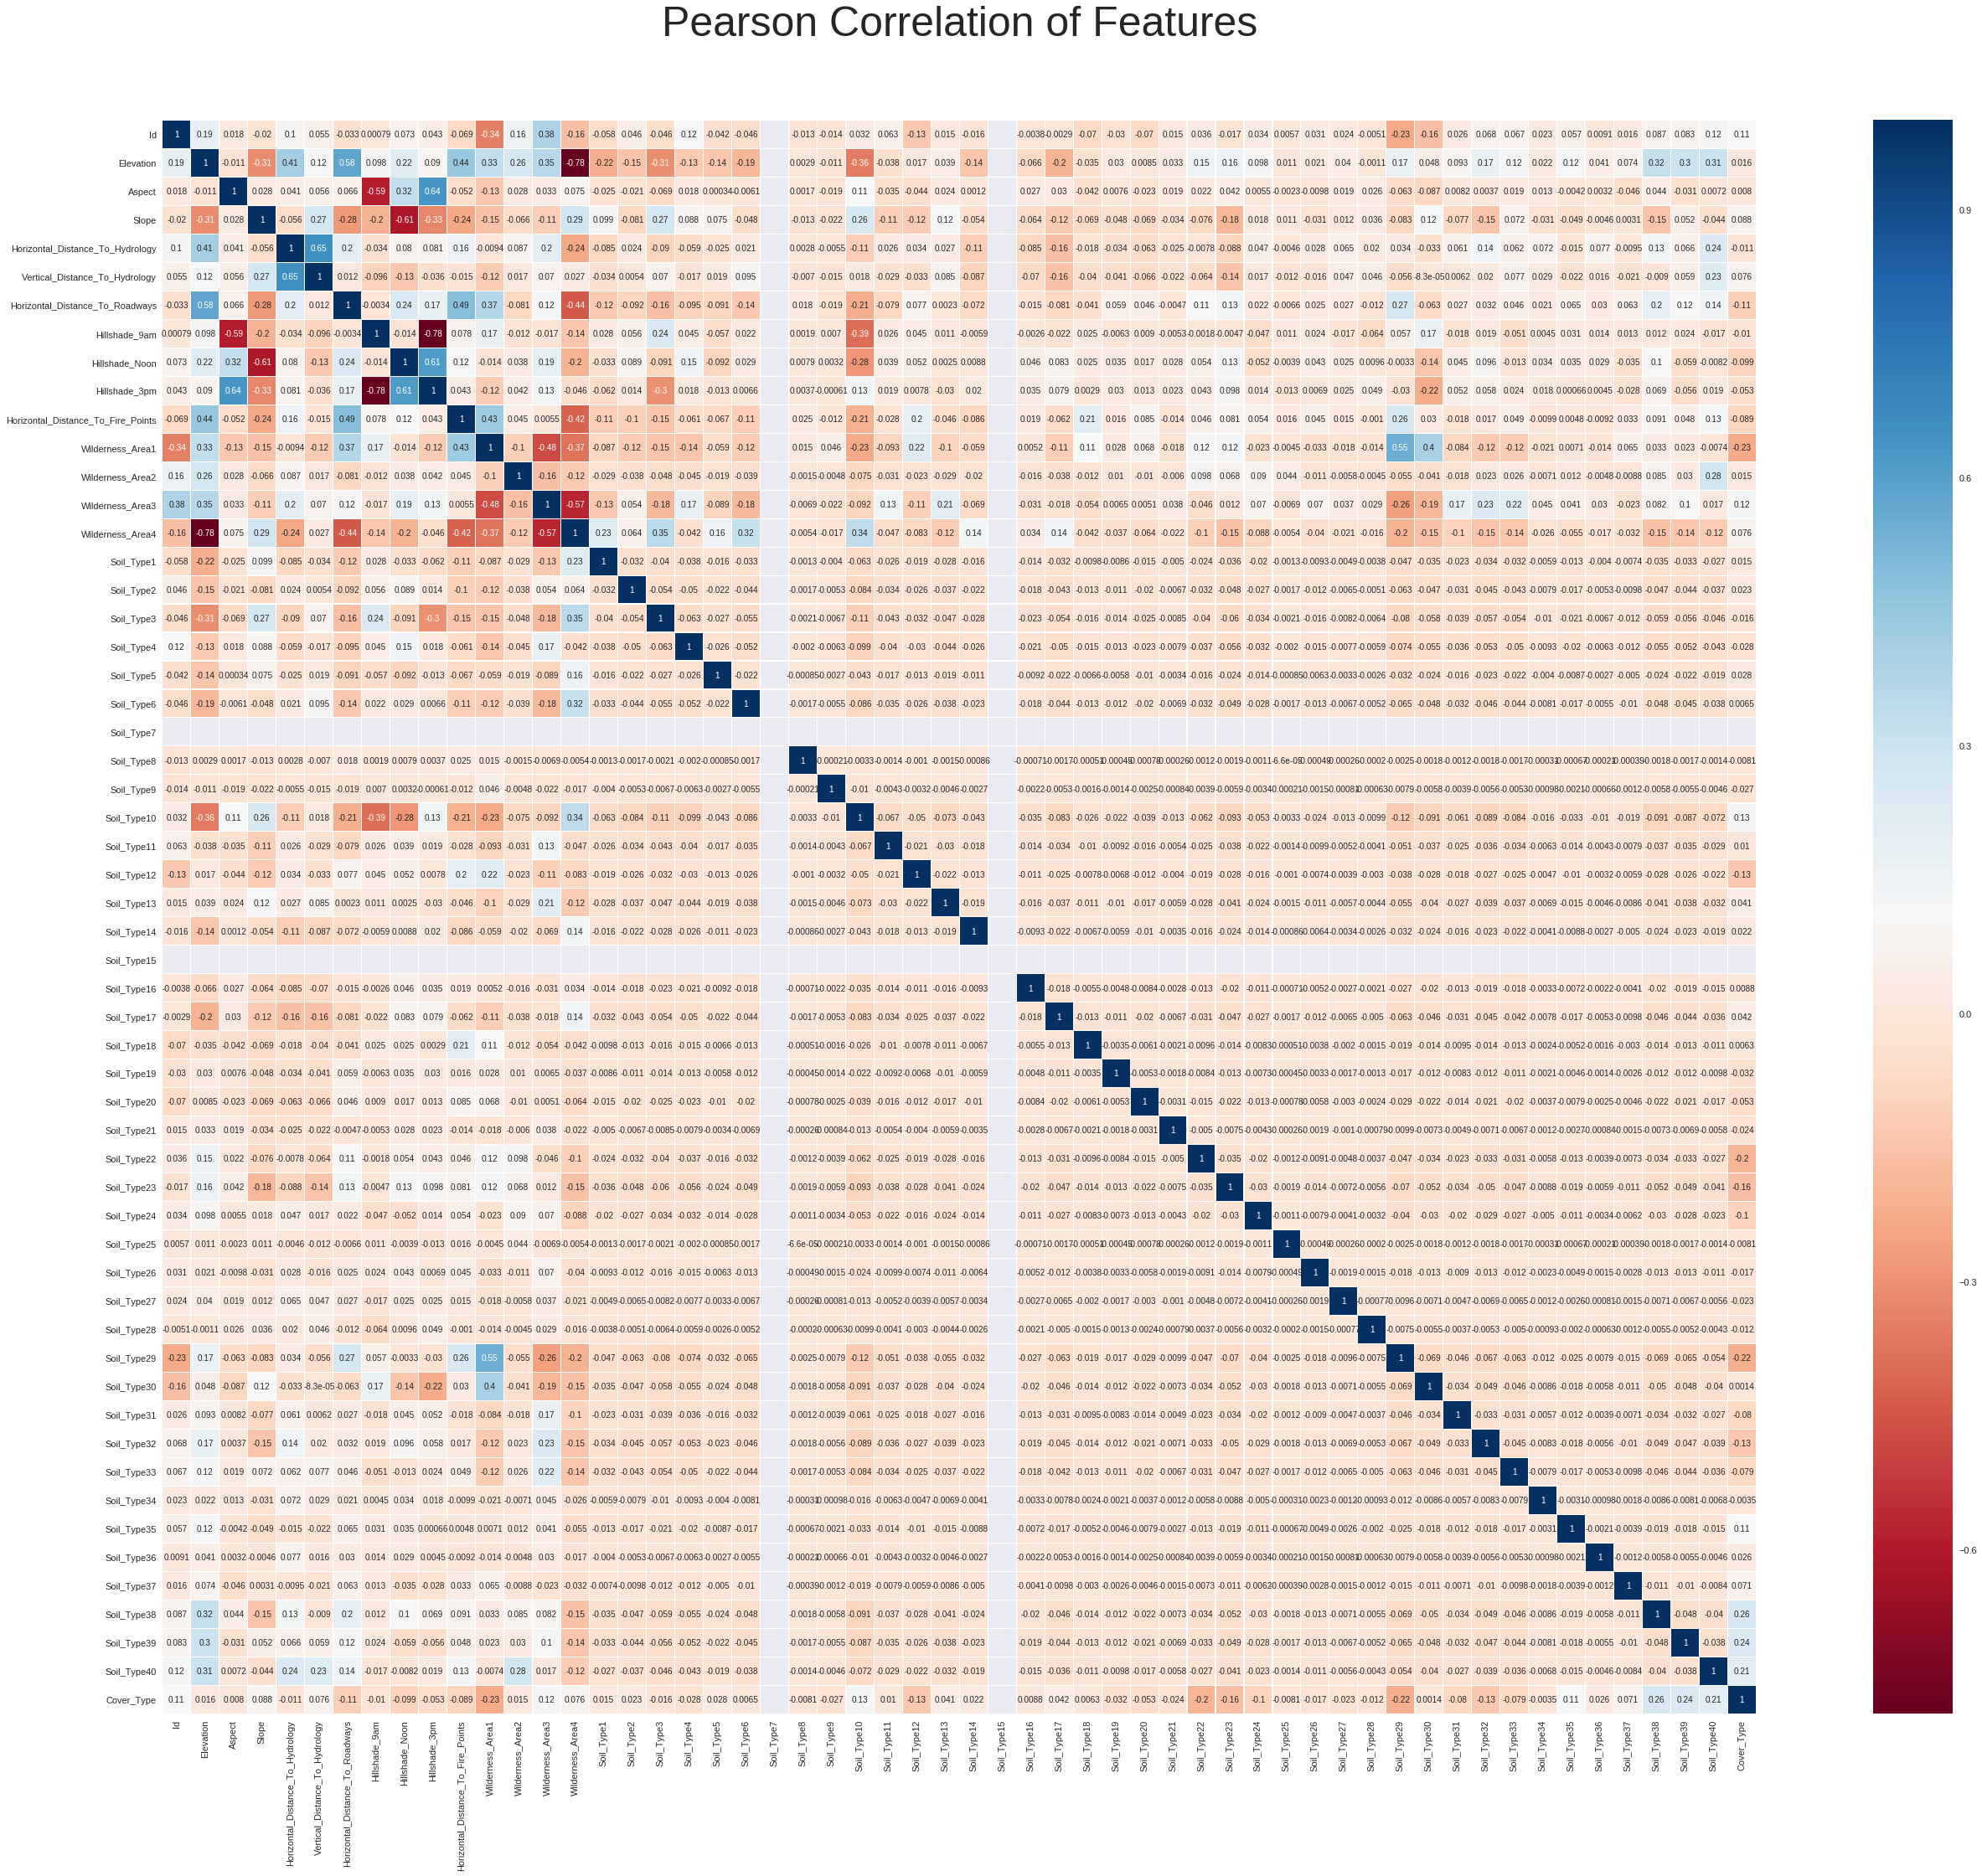

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,35))
plt.title('Pearson Correlation of Features', y=1.05, size=50)
sns.heatmap(df_train.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

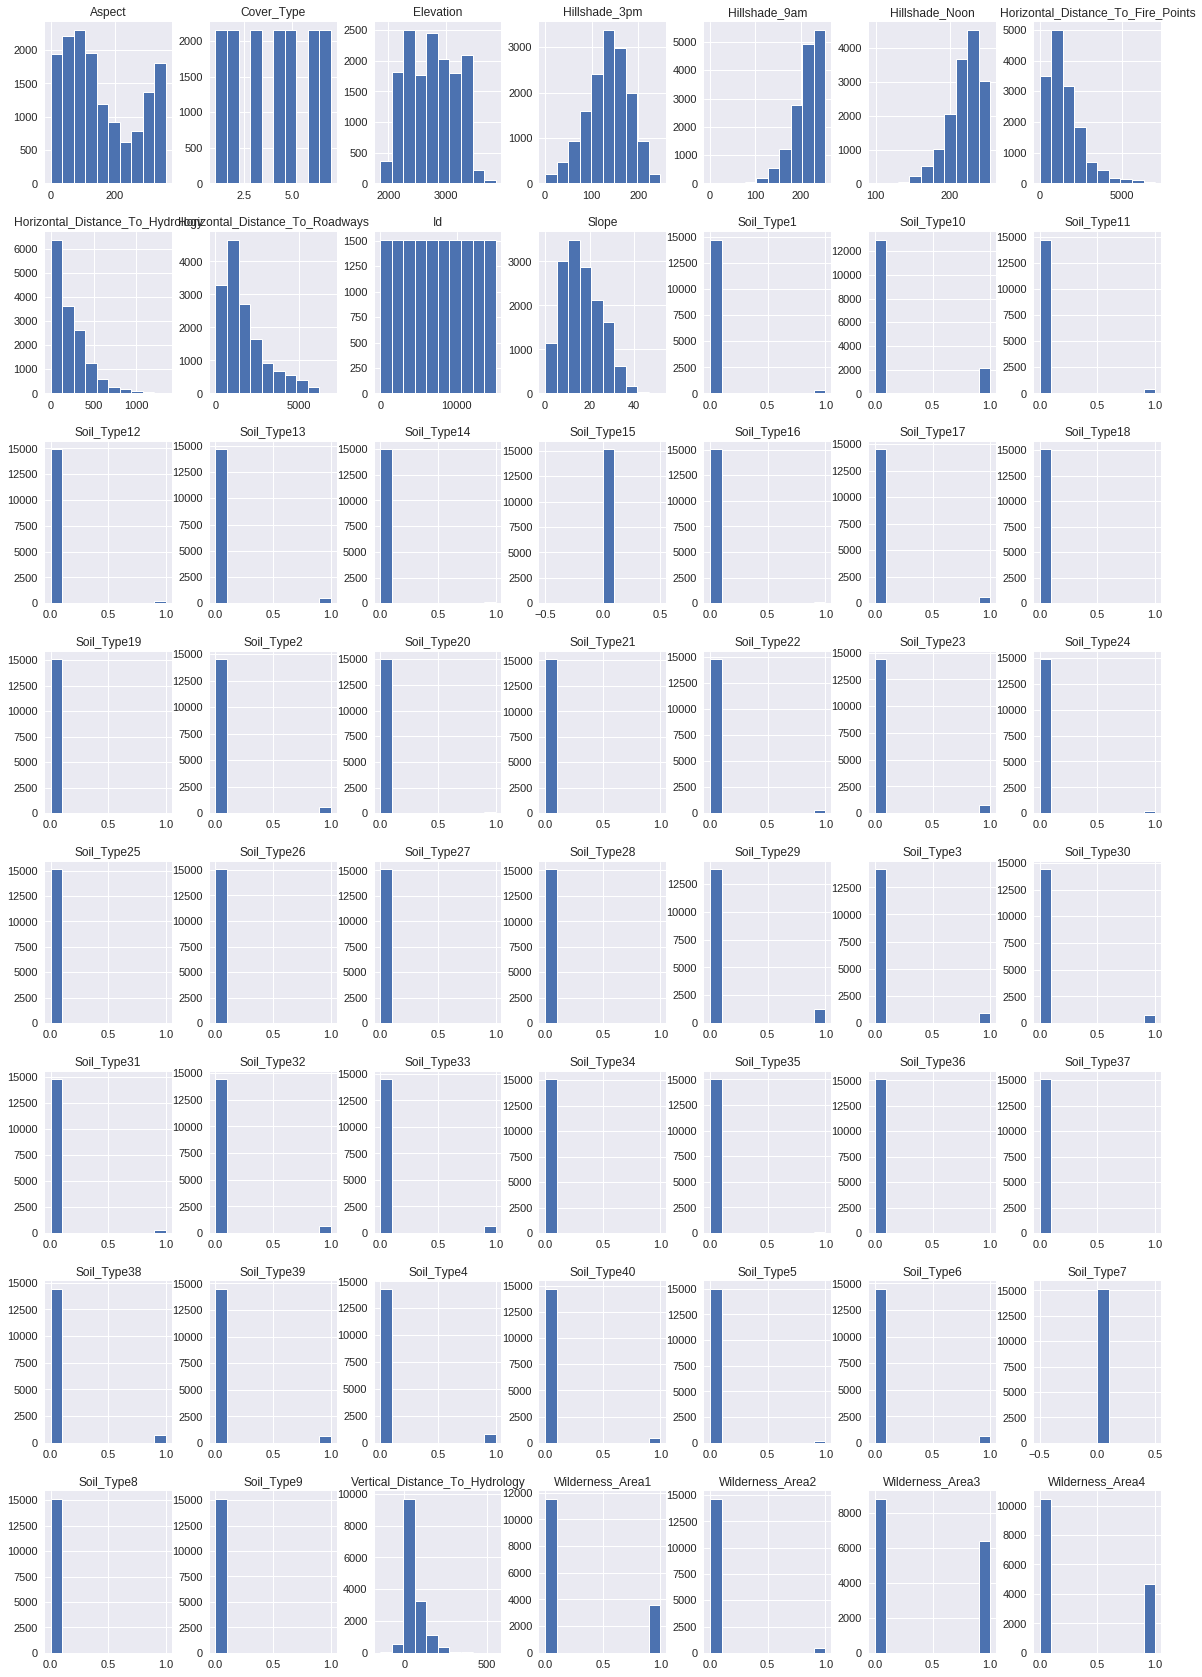

In [10]:
df_train.hist(figsize=(20,30));

# Checking if we have a balance dataset

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


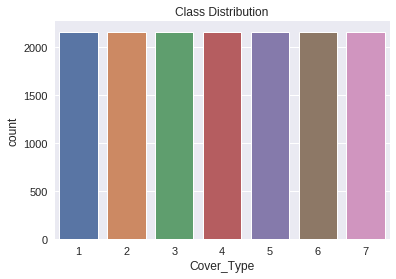

In [11]:
target = df_train.Cover_Type.value_counts()
sns.countplot(x='Cover_Type', data=df_train)
plt.title('Class Distribution');
print(target)

# Exploratory Data Analysis

* This is another method of analysing our data you can choose what method you want to use either this or the hard coding techniques you can check the documentation here: https://pandas-profiling.github.io/pandas-profiling/docs/

In [12]:
pp.ProfileReport(df_train)

# Splitting our data to training and validation set
* We will split our data to training set(70%), validation set(30%). We need to split our data for model evaluation to know how good the model is.

# Target Variable

* Our target variable is Cover_Type

**1** - Spruce/Fir

**2** - Lodgepole Pine

**3** - Ponderosa Pine

**4** - Cottonwood/Willow

**5** - Aspen

**6** - Douglas-fir

**7** - Krummholz

In [13]:
lst = ['Id', 'Cover_Type']

X = df_train.drop(lst, axis=1)
y = df_train.Cover_Type
test_X = df_test.drop('Id', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (10584, 54)
X_test:  (4536, 54)
y_train:  (10584,)
y_test:  (4536,)


# Let's build our model

In [14]:
from sklearn.model_selection import KFold
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))

results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

 LR : 0.664117 (0.016282)
 LDA : 0.644373 (0.014355)
 KNN : 0.788456 (0.014169)
 NB : 0.588530 (0.013789)
 SVM : 0.140499 (0.011835)


# Improve Performance with Ensembles and Algorithm Tuning


In [15]:
from sklearn.model_selection import KFold
models = []
models.append(( 'Adab' , AdaBoostClassifier()))
models.append(( 'Bagging' , BaggingClassifier()))
models.append(( 'GBC' , GradientBoostingClassifier()))
models.append(( 'RF' , RandomForestClassifier()))


results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

Adab: 0.400135 (0.059255)
Bagging: 0.822563 (0.008188)
GBC: 0.791761 (0.012901)
RF: 0.823696 (0.009713)


# Parameter tuning

In [16]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,20,50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

kfold = KFold(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




Best: 0.855348 using {'max_features': 'sqrt', 'n_estimators': 100}


In [17]:

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test =scaler.transform(X_test)
RF = RandomForestClassifier(n_estimators=100, max_features='auto').fit(X_train,y_train)
y_pred = RF.predict(test_X)




In [18]:
y_pred_1 = RF.predict(test_X)
sub = pd.DataFrame({'ID': df_test.Id,
                       'TARGET': y_pred_1})
sub.to_csv('submission.csv')

# Conclusion
> In our training set we got a 85% accuracy while in our testing set we got just only 74% you can improve the accuracy by decreasing the features you can use (RFE, Principle component analysis, and features importance techniques to help you to choose what features you need to use) also using other preprocessing techniques like ( MinMaxScaler, StandardScaler, Normalizer, Binarizer ). If you guys have other techniques to help to improve the accuracy you can share your kernel in the comment section i want to learn more.


# Summary

* **Problem** (Classify forest types based on information about the area)
* **Evaluation Algorithms** ( Knn got the highest accuracy )
* **Esemble Methods** ( Randomforest much better than other algorithms )
* **Algorithm Tuning** ( using n_estimators =100 and max_Features = auto, the accuracy of random forest improve by 3 %)



![](https://wi-images.condecdn.net/image/p9bvjVrG32E/crop/2040/f/upvote-default.png)